In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylablib
from pylablib.devices import Thorlabs

In [3]:
Thorlabs.list_cameras_tlcam()

['24140']

In [6]:
cam1 = Thorlabs.ThorlabsTLCamera(serial=Thorlabs.list_cameras_tlcam()[0])

In [15]:
print(cam1.get_acquisition_parameters())
cam1.get_data_dimensions()
cam1.get_device_info()
cam1.get_detector_size()
cam1.get_exposure()
cam1.get_ext_trigger_parameters()
cam1.get_frame_format()
cam1.get_full_info()

None


{'image_indexing': 'rct',
 'frame_format': 'list',
 'frame_info_format': 'namedtuple',
 'frame_info_period': 1,
 'exposure': 0.045999,
 'roi': (0, 4096, 0, 3000, 1, 1),
 'trigger_mode': 'int',
 'ext_trigger': 'rise',
 'hotpixel_correction': (0, 819),
 'gain': 0.0,
 'black_level': 5,
 'led': 1,
 'color_format': TColorFormat(color_format='raw', color_space='linear'),
 'frame_period': 0.046097,
 'buffer_size': 0,
 'acquired_frames': 0,
 'acquisition_in_progress': False,
 'frames_status': TFramesStatus(acquired=0, unread=0, skipped=0, buffer_size=0),
 'data_dimensions': (3000, 4096),
 'frame_timings': TAcqTimings(exposure=0.045999, frame_period=0.046097),
 'roi_limits': (TAxisROILimit(min=260, max=4096, pstep=1, sstep=1, maxbin=16),
  TAxisROILimit(min=4, max=3000, pstep=1, sstep=1, maxbin=16)),
 'cls': 'ThorlabsTLCamera',
 'conn': '24140',
 'detector_size': (4096, 3000),
 'frame_info_fields': ['frame_index',
  'framestamp',
  'pixelclock',
  'pixeltype',
  'offset'],
 'device_info': TDevi

(128, 272)


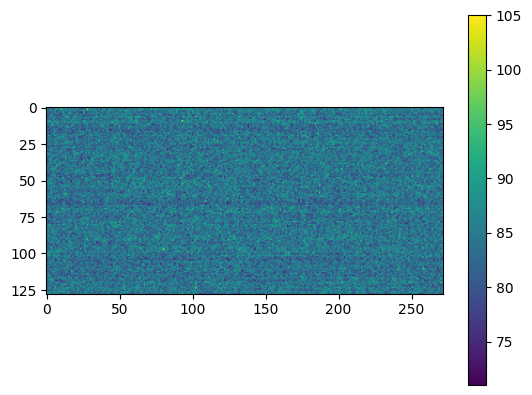

In [48]:
cam1.send_software_trigger()
image = cam1.grab(nframes=1)
print(image[0].shape)
plt.imshow(image[0])
plt.colorbar()

In [45]:
cam1.send_software_trigger()

In [47]:
cam1.set_exposure(0.0001)

9.8e-05

In [41]:
cam1.set_roi(hstart=1500, hend=2012, vstart=1500, vend=2012, hbin=1, vbin=1)

(1500, 2588, 1500, 2012, 4, 4)

In [49]:
cam1.close()